# The effect of capping rate in the Weichsel-Schwarz model

- The network's steady-state growth rate decreases linearly as the capping rate increases. Once this reaches ~100 per second per filament, the growth rate drops precipitously to around 100 nm/s.

In [1]:
from weichselSchwarz2 import *
from numpy import array, linspace, empty, gradient, mean
from numpy.random import normal
from matplotlib.pyplot import plot
%matplotlib inline

noPoints = 50
capRateArr = linspace(20.0, 200.0, noPoints)
meanNetworkVelArr = empty(noPoints)
noBranchesArr = empty(noPoints)
noCapsArr = empty(noPoints)
noActiveArr = empty(noPoints)

for i in range(noPoints):
    n = network(1, 7140, capRateArr[i], 400, 4, 5.7, recordHistory = True)
    n.evolve(2.7e-3, 20.0)
    timeArr = linspace(0, n.tElapsed, len(n.xEdge))
    gradTimeArr = gradient(timeArr)
    networkVelArr = gradient(n.xEdge) / gradTimeArr
    meanNetworkVelArr[i] = mean(networkVelArr[:-300])
    noBranchesArr[i] = n.noFilaments[-1][1]
    noCapsArr[i] = n.noFilaments[-1][2]
    noActiveArr[i] = n.noActive
    del n

Text(0,0.5,'Steady state growth rate (nm/s)')

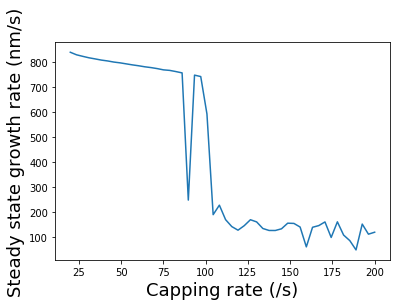

In [2]:
from matplotlib.pyplot import xlabel, ylabel
plot(capRateArr, meanNetworkVelArr)
xlabel(r"Capping rate (/s)", fontsize = 18)
ylabel(r"Steady state growth rate (nm/s)", fontsize = 18)

[ 142348.  143265.  142805.  143180.  141880.  142883.  143328.  142537.
  142635.  142689.  142523.  142849.  142433.  143164.  143010.  141605.
  142457.  143169.  142440.   25388.  143049.  142555.  105902.   19888.
   20047.    9302.    9552.   10791.    8125.    8605.    9352.    7794.
    8010.    8067.    7962.    7929.    7936.    7699.    7869.    7822.
    7678.    7665.    7711.    7826.    7823.    7809.    7807.    1771.
    7843.    1001.]


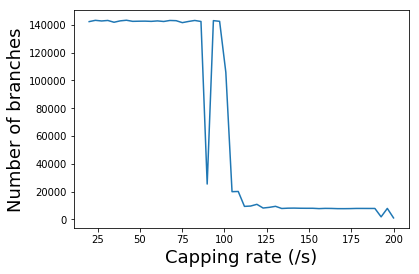

In [3]:
plot(capRateArr, noBranchesArr)
xlabel(r"Capping rate (/s)", fontsize = 18)
ylabel(r"Number of branches", fontsize = 18)
print(noBranchesArr)

[  90461.  104750.  111432.  117474.  119773.  123420.  125360.  126347.
  127559.  128511.  129409.  130523.  130730.  131744.  131578.  131137.
  132092.  133444.  132745.   19494.  134160.  133933.   98559.   14368.
   14815.    4266.    4612.    5810.    3378.    3977.    4732.    3397.
    4023.    3735.    3662.    3786.    3823.    3642.    4924.    3975.
    3968.    3983.    3939.    4349.    4959.    5402.    4671.    2174.
    4864.    1402.]


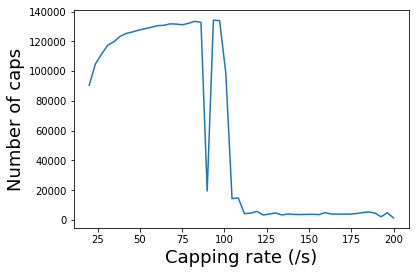

In [4]:
plot(capRateArr, noCapsArr)
xlabel(r"Capping rate (/s)", fontsize = 18)
ylabel(r"Number of caps", fontsize = 18)
print(noCapsArr)

[ 216.  222.  164.  162.  137.  149.  133.  118.  107.  106.   85.   99.
   80.   80.   72.   66.   60.   72.   65.    1.   52.   56.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    0.
    1.    0.]


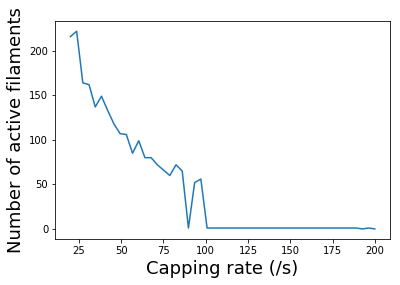

In [5]:
plot(capRateArr, noActiveArr)
xlabel(r"Capping rate (/s)", fontsize = 18)
ylabel(r"Number of active filaments", fontsize = 18)
print(noActiveArr)

Text(0,0.5,'Number of active filaments')

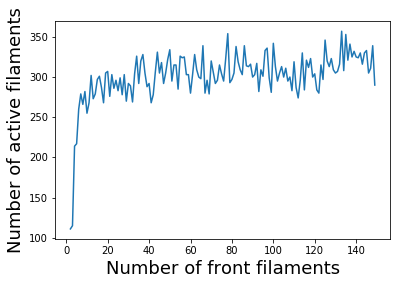

In [6]:
noFrontFilArr = arange(2, 150)
noPoints = len(noFrontFilArr)
noActiveArr = empty(noPoints)
meanNetworkVelArr = empty(noPoints)

for i in range(noPoints):
    n = network(1, 7140, 20, 400, noFrontFilArr[i], 5.7, recordHistory = True)
    n.evolve(2.7e-3, 20.0)
    noActiveArr[i] = n.noActive
    timeArr = linspace(0, n.tElapsed, len(n.xEdge))
    gradTimeArr = gradient(timeArr)
    networkVelArr = gradient(n.xEdge) / gradTimeArr
    meanNetworkVelArr[i] = mean(networkVelArr[:-300])
    del n
    
plot(noFrontFilArr, noActiveArr)
xlabel(r"Number of front filaments", fontsize = 18)
ylabel(r"Number of active filaments", fontsize = 18)

Text(0,0.5,'Steady state growth rate (nm/s)')

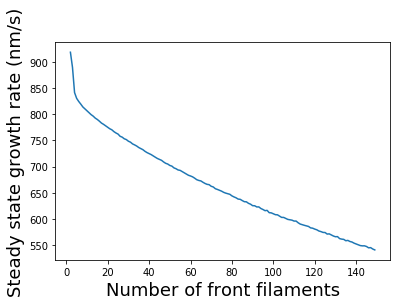

In [7]:
plot(noFrontFilArr, meanNetworkVelArr)
xlabel(r"Number of front filaments", fontsize = 18)
ylabel(r"Steady state growth rate (nm/s)", fontsize = 18)